# Data Analysis - Forma AI


Data Description
There are three tables involved in this question: `transactions`, `segments` and
`products`, which simulate a simplified retail data schema.  Here is a semantic
description of the tables:

- `transactions`: contains detailed information about each product a customer
   has purchased.  A transaction consists of one or more products purchased by
   a customer indexed by a unique transaction id.
   * `trans_id`: the transaction id
   * `cust_id`: the customer id
   * `prod_id`: the product id
   * `item_qty`: the quantity of the product that is being purchased
   * `item_price`: the per unit price of the product (NOTE: the total revenue
     for a product is `item_qty * item_price`)
- `products`: contains detailed attributes about each product.
   * `prod_id`: the product id (same meaning as in `transactions`)
   * `prod_name`: the product name
   * `brand`: the brand of the product
   * `category`: the category of the product
- `segments`: contains a history of customer segmentation labelling for each
   customer.  Segments are computed periodically for all current customers and
   appended to the table after each computation.  The current (most up to date)
   active segment for each customer is specified by `active_flag = 'Y'` column.
   * `cust_id`: the customer id (same meaning as in `transactions`)
   * `seg_name`: the segment of this customer
   * `update_dt`: the date when this segment was updated
   * `active_flag`: whether or not this segment is the active segment for this customer

### Steps -

1. Joined the 3 tables from the database using the following code - <br>
    `select t.trans_id, t.trans_dt, t.cust_id, t.prod_id, t.item_qty, t.item_price,
    s.seg_name, s.update_at, s.active_flag, p.prod_name, p.brand, p.category
    from transactions t
    join segments s
    on t.cust_id =  s.cust_id
    join products p
    on t.prod_id = p.prod_id`
2. Saved it as a csv file  called *insights.csv*.
    - Visually assessed the data in Microsoft Excel
3. In Jupyter Notebook, read the csv file to a dataframe called 'df'.
4. Assessed and Cleaned the dataframe. 
    - Checked for Nulls.
    - Checked for Duplicates.
    - Inspected dataframe for data discrepencies. 
    - Found the unique values and top count for number or rows in the dataframe.
    - Converted *trans_dt* and *update_at* to datetime datatype.
    - Converted *trans_id, cust_id and prod_id* to categorical datatype. 
    - Extracted months from trans_dt and made a new column called *trans_month*.
    - Verified the changes made to the dataframe at various stages.
5. Exploratary analysis done by visualizing the data, searching for insights.   
6. Based on the findings, summarized the insights. 
7. Explanatory analysis presented in powerpoint to provide results. 

In [647]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

## Gather Data

In [648]:
#read csv data into the dataframe 'df'
df = pd.read_csv('insights.csv')

## Assess and Clean Data

In [649]:
#display few rows of the dataframe
df.head()

,trans_id,trans_dt,cust_id,prod_id,item_qty,item_price,seg_name,update_at,active_flag,prod_name,brand,category
0,1,2016-01-02 10:06:00,9085146,223029,1,42.99,GONE AWAY,2015-11-01 00:00:00,N,Product 223029,L,Make up
1,1,2016-01-02 10:06:00,9085146,223029,1,42.99,INACTIVE,2014-09-01 00:00:00,N,Product 223029,L,Make up
2,1,2016-01-02 10:06:00,9085146,223029,1,42.99,INACTIVE,2016-01-01 00:00:00,N,Product 223029,L,Make up
3,1,2016-01-02 10:06:00,9085146,223029,1,42.99,LAPSED,2014-01-01 00:00:00,N,Product 223029,L,Make up
4,1,2016-01-02 10:06:00,9085146,223029,1,42.99,LAPSED,2014-03-01 00:00:00,N,Product 223029,L,Make up


In [650]:
#display number of rows and columns of the dataframe
df.shape

(18097, 12)

> The original dataframe has **18097 rows** and **12 columns**

In [651]:
#summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18097 entries, 0 to 18096
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   trans_id     18097 non-null  int64  
 1   trans_dt     18097 non-null  object 
 2   cust_id      18097 non-null  int64  
 3   prod_id      18097 non-null  int64  
 4   item_qty     18097 non-null  int64  
 5   item_price   18097 non-null  float64
 6   seg_name     18097 non-null  object 
 7   update_at    18097 non-null  object 
 8   active_flag  18097 non-null  object 
 9   prod_name    18097 non-null  object 
 10  brand        18097 non-null  object 
 11  category     18097 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 1.7+ MB


In [652]:
#Check for null values
df.isnull().sum()

trans_id       0
trans_dt       0
cust_id        0
prod_id        0
item_qty       0
item_price     0
seg_name       0
update_at      0
active_flag    0
prod_name      0
brand          0
category       0
dtype: int64

> No Null values are found

In [653]:
#check for duplicate values
df.duplicated().sum()

2

> Dataframe seems to have duplicates

In [654]:
#display the the duplicated rows
df[df.duplicated()]

,trans_id,trans_dt,cust_id,prod_id,item_qty,item_price,seg_name,update_at,active_flag,prod_name,brand,category
9880,1620,2016-01-02 11:02:00,9960002,223909,1,31.99,GONE AWAY,2015-06-01 00:00:00,N,Product 223909,L,Make up
9881,1620,2016-01-02 11:02:00,9960002,223909,1,31.99,ONE-OFFS,2016-02-01 00:00:00,Y,Product 223909,L,Make up


In [655]:
#drop duplicates, keeping the last record because the active_flag = Y
df.drop_duplicates(inplace = True)

In [656]:
#verify the duplicates have been dropped
df.duplicated().sum(), df.shape

(0, (18095, 12))

In [657]:
df[df['trans_id'] == 1620]

,trans_id,trans_dt,cust_id,prod_id,item_qty,item_price,seg_name,update_at,active_flag,prod_name,brand,category
9878,1620,2016-01-02 11:02:00,9960002,223909,1,31.99,GONE AWAY,2015-06-01 00:00:00,N,Product 223909,L,Make up
9879,1620,2016-01-02 11:02:00,9960002,223909,1,31.99,ONE-OFFS,2016-02-01 00:00:00,Y,Product 223909,L,Make up


> The duplicates (row - 9880 and 9881) have been dropped, now we have 18095 entries

In [658]:
#description of quntitative data
df.describe()

,trans_id,cust_id,prod_id,item_qty,item_price
count,18095.000000,1.809500e+04,1.809500e+04,18095.000000,18095.000000
mean,1418.033987,8.705213e+06,7.344467e+07,1.050014,37.366029
std,777.953111,5.132218e+06,1.113840e+08,0.274736,26.949988
min,1.000000,4.402000e+03,1.999220e+05,1.000000,0.400000
25%,747.000000,4.134518e+06,2.507560e+05,1.000000,19.990000
50%,1483.000000,8.468925e+06,4.082950e+05,1.000000,31.990000
75%,2105.000000,1.307541e+07,1.382621e+08,1.000000,49.990000
max,2666.000000,2.123399e+07,4.078207e+08,4.000000,215.950000


In [659]:
df[(df['active_flag'] == 'N') & (df['seg_name'] == 'VIP')]

,trans_id,trans_dt,cust_id,prod_id,item_qty,item_price,seg_name,update_at,active_flag,prod_name,brand,category
298,58,2016-01-02 12:02:00,4486900,249114,1,24.99,VIP,2014-01-01 00:00:00,N,Product 249114,C,Make up
310,62,2016-01-02 15:51:00,14225812,261117,1,15.99,VIP,2014-01-01 00:00:00,N,Product 261117,G,Make up
311,62,2016-01-02 15:51:00,14225812,261117,1,15.99,VIP,2014-10-01 00:00:00,N,Product 261117,G,Make up
312,62,2016-01-02 15:51:00,14225812,261117,1,15.99,VIP,2015-05-01 00:00:00,N,Product 261117,G,Make up
317,62,2016-01-02 15:51:00,14225812,268232,1,15.99,VIP,2014-01-01 00:00:00,N,Product 268232,G,Make up
...,...,...,...,...,...,...,...,...,...,...,...,...
18073,2662,2016-06-18 10:00:00,3649704,364872356,1,41.99,VIP,2015-01-01 00:00:00,N,Product 364872356,L,Sun
18074,2662,2016-06-18 10:00:00,3649704,364872356,1,41.99,VIP,2015-05-01 00:00:00,N,Product 364872356,L,Sun
18075,2662,2016-06-18 10:00:00,3649704,364872356,1,41.99,VIP,2015-08-01 00:00:00,N,Product 364872356,L,Sun
18089,2665,2016-06-18 17:51:00,4095901,277123,1,89.99,VIP,2014-06-01 00:00:00,N,Product 277123,G,Men


In [660]:
df[(df['active_flag'] == 'N') & (df['seg_name'] == 'LOYAL')]

,trans_id,trans_dt,cust_id,prod_id,item_qty,item_price,seg_name,update_at,active_flag,prod_name,brand,category
47,9,2016-01-02 11:55:00,5904487,258744,1,38.99,LOYAL,2014-05-01 00:00:00,N,Product 258744,C,Women
48,9,2016-01-02 11:55:00,5904487,258744,1,38.99,LOYAL,2014-06-01 00:00:00,N,Product 258744,C,Women
49,9,2016-01-02 11:55:00,5904487,258744,1,38.99,LOYAL,2014-12-01 00:00:00,N,Product 258744,C,Women
78,17,2016-01-02 12:35:00,2591778,223453,1,49.99,LOYAL,2015-05-01 00:00:00,N,Product 223453,S,Women
79,17,2016-01-02 12:35:00,2591778,223453,1,49.99,LOYAL,2015-09-01 00:00:00,N,Product 223453,S,Women
...,...,...,...,...,...,...,...,...,...,...,...,...
18057,2662,2016-06-18 10:00:00,3649704,365543537,1,30.99,LOYAL,2014-12-01 00:00:00,N,Product 365543537,L,Women
18068,2662,2016-06-18 10:00:00,3649704,364872356,1,41.99,LOYAL,2014-12-01 00:00:00,N,Product 364872356,L,Sun
18085,2665,2016-06-18 17:51:00,4095901,277123,1,89.99,LOYAL,2014-05-01 00:00:00,N,Product 277123,G,Men
18086,2665,2016-06-18 17:51:00,4095901,277123,1,89.99,LOYAL,2014-10-01 00:00:00,N,Product 277123,G,Men


**Checkout different series in the dataframe -**

In [661]:
df.seg_name.value_counts()

INFREQUENT    5013
VIP           4858
LOYAL         3632
ONE-OFFS      2359
LAPSED        1138
INACTIVE       485
NEW            387
GONE AWAY      223
Name: seg_name, dtype: int64

In [662]:
df.category.value_counts()

Women          8360
Make up        6493
Men            2069
Accessoires     866
Sun             307
Name: category, dtype: int64

In [663]:
df.active_flag.value_counts()

N    14237
Y     3858
Name: active_flag, dtype: int64

In [664]:
df.cust_id.nunique(), df.prod_id.nunique(), df.trans_id.nunique()

(971, 1863, 1491)

In [665]:
#changing the trans_dt, updated_at datatype to datetime object
df["trans_dt"] = pd.to_datetime(df["trans_dt"])
df["update_at"] = pd.to_datetime(df["update_at"])
#verify changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18095 entries, 0 to 18096
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   trans_id     18095 non-null  int64         
 1   trans_dt     18095 non-null  datetime64[ns]
 2   cust_id      18095 non-null  int64         
 3   prod_id      18095 non-null  int64         
 4   item_qty     18095 non-null  int64         
 5   item_price   18095 non-null  float64       
 6   seg_name     18095 non-null  object        
 7   update_at    18095 non-null  datetime64[ns]
 8   active_flag  18095 non-null  object        
 9   prod_name    18095 non-null  object        
 10  brand        18095 non-null  object        
 11  category     18095 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(4), object(5)
memory usage: 1.8+ MB


In [666]:
#Change the columns to categorical types because we won't manipulate or perform math opertaions on these variables 
#They are considered as label groups even though they are integers
#df[['trans_id', 'cust_id', 'prod_id']].apply(lambda x: x.astype('category'))

for col in ['trans_id', 'cust_id', 'prod_id']:
    df[col] = df[col].astype('category')

In [667]:
#Extracting month from datetime object
df['trans_month'] = df['trans_dt'].dt.month_name()
#Verify the new coloumn
df.head()

,trans_id,trans_dt,cust_id,prod_id,item_qty,item_price,seg_name,update_at,active_flag,prod_name,brand,category,trans_month
0,1,2016-01-02 10:06:00,9085146,223029,1,42.99,GONE AWAY,2015-11-01,N,Product 223029,L,Make up,January
1,1,2016-01-02 10:06:00,9085146,223029,1,42.99,INACTIVE,2014-09-01,N,Product 223029,L,Make up,January
2,1,2016-01-02 10:06:00,9085146,223029,1,42.99,INACTIVE,2016-01-01,N,Product 223029,L,Make up,January
3,1,2016-01-02 10:06:00,9085146,223029,1,42.99,LAPSED,2014-01-01,N,Product 223029,L,Make up,January
4,1,2016-01-02 10:06:00,9085146,223029,1,42.99,LAPSED,2014-03-01,N,Product 223029,L,Make up,January


## Visualization - Exploratory Analysis

**Question: Who are the top 5 most valuable customers in the record?**

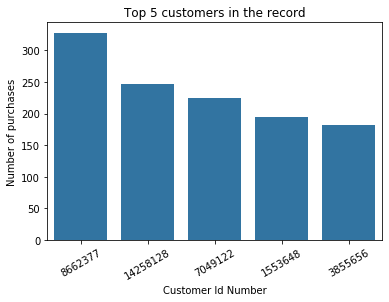

In [668]:
#create plot
base_color = sb.color_palette()[0]
customers_id = df.cust_id.value_counts()[:5].index
#sb.barplot(x=df.cust_id.value_counts()[:5].index, y=df.cust_id.value_counts()[:5], color=base_color);
sb.countplot(data=df , x='cust_id', color=base_color, order=df.cust_id.value_counts()[:5].index);
plt.xlabel('Customer Id Number')
plt.xticks(rotation = 30)
plt.ylabel('Number of purchases')
plt.title('Top 5 customers in the record');

> Customer with id = **8662377** has the most number of transcations(over 300) in the lifetime followed by customer id **14258128** and **7049122**. 


**Question : What is the top selling category?**

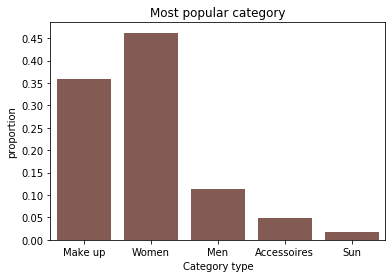

In [669]:
#generate proportion
n_points = df.shape[0]
max_count = df['category'].value_counts().max()
max_prop = max_count/n_points

#generate tick mark location and names 
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

#create plot
sb.countplot(data=df, x='category', color=sb.color_palette()[5])
plt.yticks(tick_props * n_points, tick_names)
plt.ylabel('proportion')
plt.xlabel('Category type')
plt.title('Most popular category');

> 'Women' category is close to 50% of purchases, hence it is the most popular item that people like to buy. 

> 'Women' and 'Make up' together are dominant selling products. 

> 'Men', 'Accessories', and 'Sun' are not doing well. 'Accessories' and 'Sun' make up only 5% of sales. These products needs to be reconsidered. 

**Visualizing different Segments of cusomters**

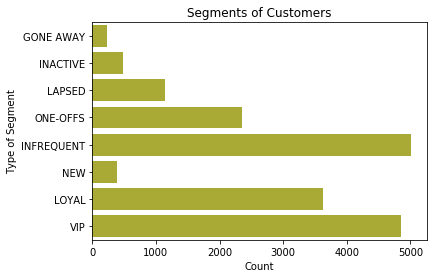

In [670]:
sb.countplot(data=df, y='seg_name', color=sb.color_palette()[8])
plt.ylabel('Type of Segment')
plt.xlabel('Count')
plt.title('Segments of Customers');

> Few 'New' segments of customers are introduced in year of 2016. Looks like company is not interested in bringing new consumers or the efforts are not up to the mark. 

> It would be great to convert loyal customers to become VIP. 

**Question : What is the purchase pattern of loyal customers based on the current category offerings?**

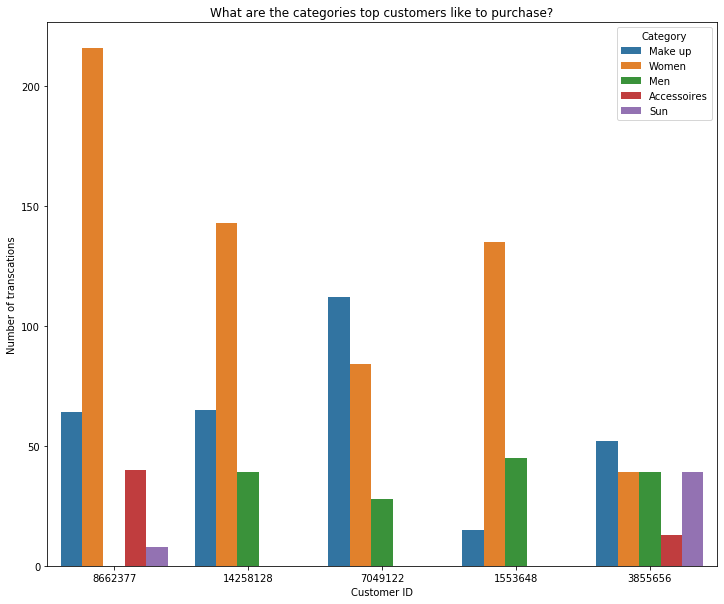

In [671]:
#Visualization of the purchases of top 10 customers in the dataframe
#create plot - Top 5 ranked Customers 
plt.figure(figsize=[12, 10])
sb.countplot(data=df, x='cust_id' , hue='category', order=df.cust_id.value_counts()[:5].index);
plt.title('What are the categories top customers like to purchase?')
plt.ylabel('Number of transcations')
plt.xlabel('Customer ID')
plt.legend(title = 'Category');

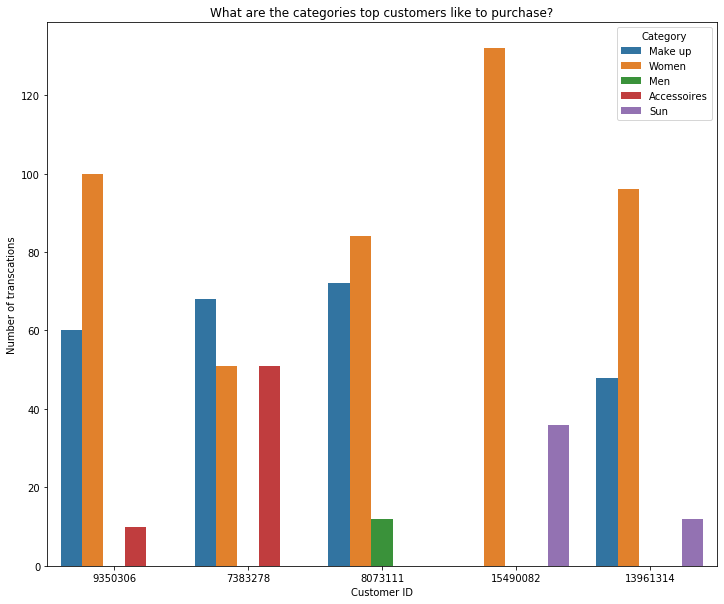

In [672]:
#create plot- Ranked 5-10 Customers
plt.figure(figsize=[12, 10])
sb.countplot(data=df, x='cust_id' , hue='category', order=df.cust_id.value_counts()[5:10].index);
plt.title('What are the categories top customers like to purchase?')
plt.ylabel('Number of transcations')
plt.xlabel('Customer ID')
plt.legend(title = 'Category');

> As we expected: 'Women' and 'Make up' are the top purchases for the customers. 

> Some customers have bought more 'Make up' over 'Women' products. 

> These customers have atleast bought 2 type of items. 


**Question: What month was the most profitable?** 

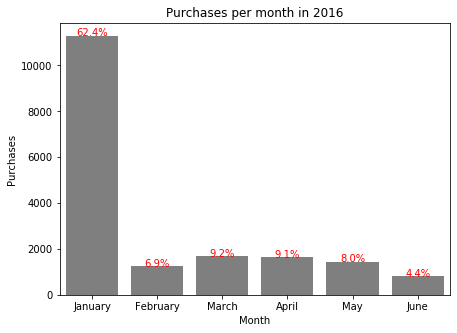

In [680]:
plt.figure(figsize =(7,5))
sb.countplot(data=df, x='trans_month', color = sb.color_palette()[7]);
plt.title('Purchases per month in 2016')
plt.ylabel('Purchases')
plt.xlabel('Month');

#add annotations
n_points = df.shape[0]
cat_counts = df.trans_month.value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels 

#loop through each pair of locations and labels 
for loc, label in zip(locs, labels):
    
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'r')
    

> In the given dataframe, January (62.4%) was the most profitable month of the year 2016. I am assuming there is a new year sale in this month.   

> March - May seems to be consistent with sales. 

> Lowest number of sales in June (4.4%). 

**Question : What is the distribution of the active segments?**

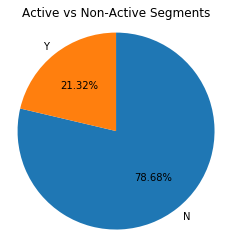

In [674]:
sorted_counts = df.active_flag.value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle=90, autopct='%1.2f%%', counterclock = False)
plt.axis('square')
plt.title('Active vs Non-Active Segments');

> Seems like flag is not active the majority of the current customers. 

**Question : How are labels associated with the categories**

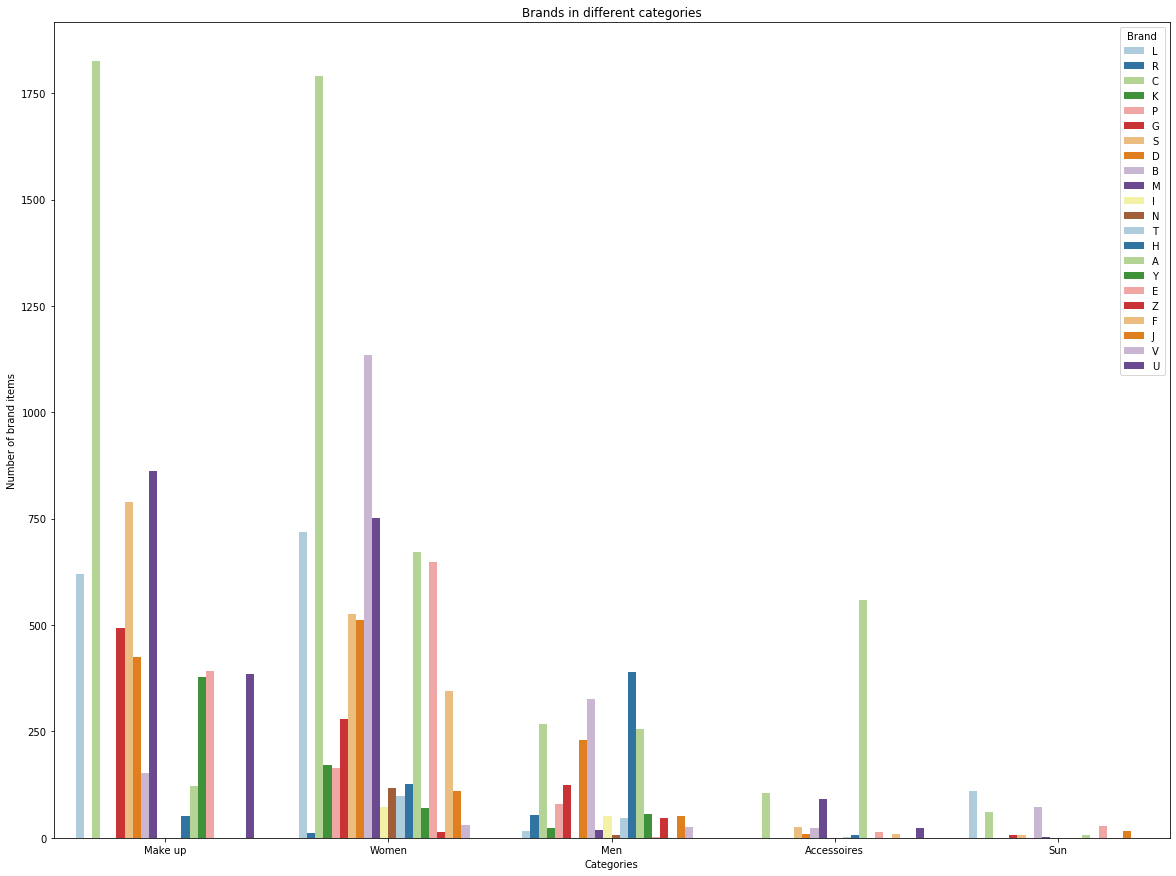

In [675]:
#createplot
plt.figure(figsize =[20,15])
pal = sb.color_palette("Paired") #color palette is friendly for colorblind individuals
sb.countplot(data=df, x='category', hue='brand', palette = pal)
plt.legend(title = 'Brand', loc='upper right')
plt.xlabel('Categories')
plt.ylabel('Number of brand items')
plt.title('Brands in different categories');

> All the categories have different types of brand selections,

> Some brands are limited to specific categories. For example - Brand 'I' can be only seen in 'Women' and 'Men'.

> Brand 'C' is the most favored.

**Question : Show the relation of price for each category**

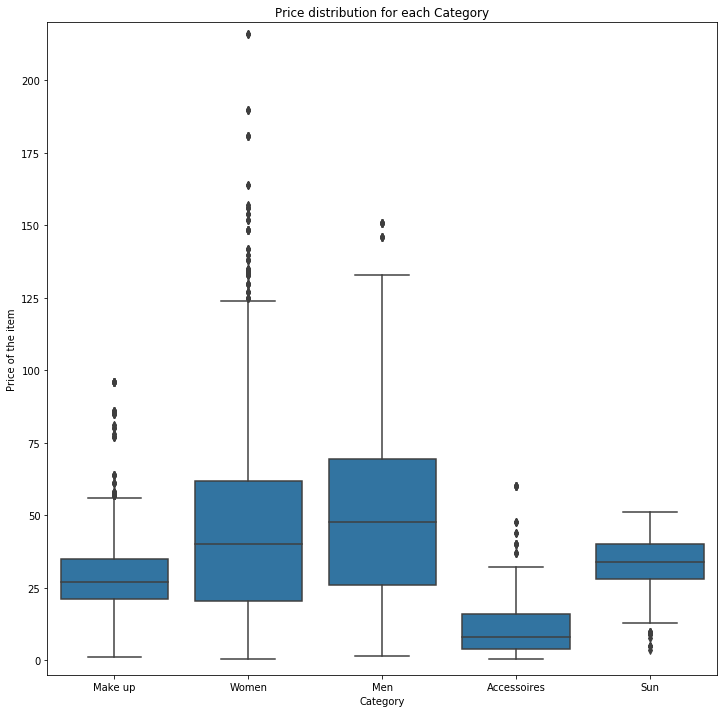

In [676]:
plt.figure(figsize =[12,12])
sb.boxplot(data=df, x='category', y='item_price', color=base_color)
plt.ylim(-5, 220)
plt.title('Price distribution for each Category')
plt.xlabel('Category')
plt.ylabel('Price of the item');

> High variance is seen in 'Women' followed by 'Men' category. Hence, 'Women' has the most expensive items present in the inventory. 

> Central Line in each plot shows indicates the median of the distribution. Top and bottom line represents the third and first quartile of the price respectively. 

> Max range is set by whisker length. Although, we can see points above the highest whisker in 'Make up', 'Women', 'Men', and 'Accessories' category. This indicates there are many outliers for these categories which are higher than the third quartile. 


In [677]:
#most_occurring_values = df['cust_id'].value_counts().head(3).index
#cars_subset = df[df['cust_id'].isin(most_occurring_values)]
#sb.stripplot(data = cars_subset, x = 'category', y = 'item_price', hue='cust_id',
#             jitter = 0.35, dodge = True, palette='Dark2')

**Showing the trend of loyal customers in respect to price and categories**

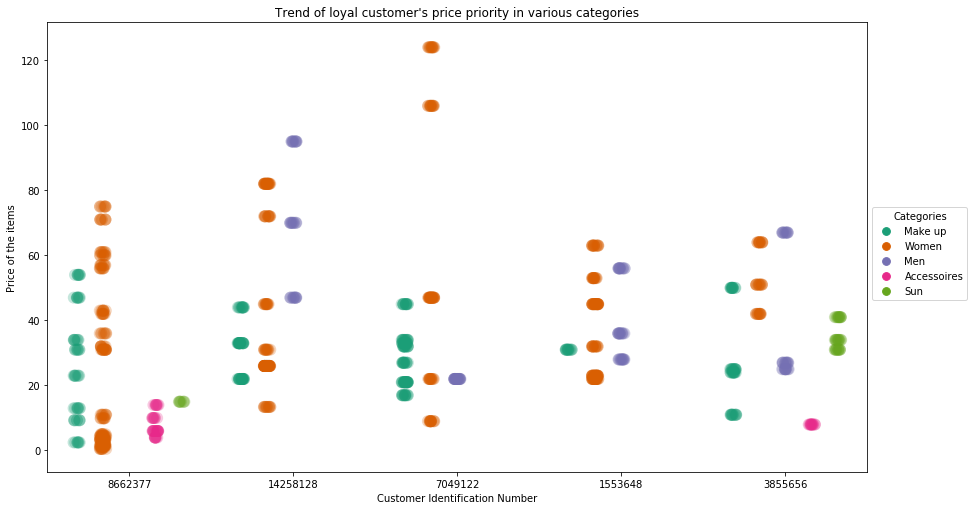

In [678]:
plt.figure(figsize=[14.70, 8.27])
sb.stripplot(x = 'cust_id', y = 'item_price',hue='category', data = df, order=df['cust_id'].value_counts()[:5].index,
             jitter=True, dodge = True,size=12, edgecolor='gray',alpha=.25, palette='Dark2')
plt.title("Trend of loyal customer's price priority in various categories")
plt.legend(title = 'Categories', bbox_to_anchor=(1,0.6) )
plt.xlabel('Customer Identification Number')
plt.ylabel('Price of the items');

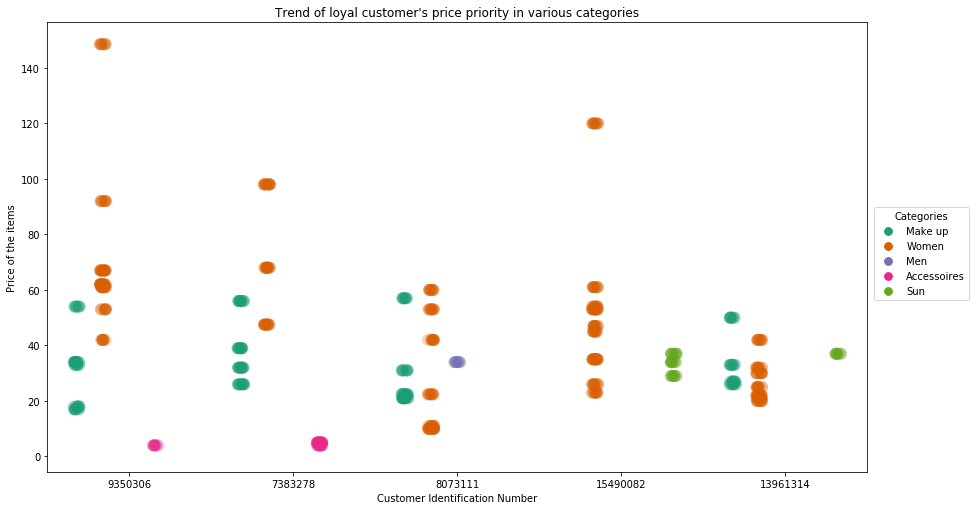

In [679]:
plt.figure(figsize=[14.70, 8.27])
sb.stripplot(x = 'cust_id', y = 'item_price',hue='category', data = df, order=df['cust_id'].value_counts()[5:10].index,
             jitter=True, dodge = True,size=12, edgecolor='gray',alpha=.25, palette='Dark2')
plt.title("Trend of loyal customer's price priority in various categories")
plt.legend(title = 'Categories', bbox_to_anchor=(1.13,0.6) )
plt.xlabel('Customer Identification Number')
plt.ylabel('Price of the items');

> Previously, in the box plots we realized the 'Women' category had the 2nd highest median. The trend of most valuable customers shows us that these folks tend to buy items under the Interquartile Range (Approx Item Price: 25-75). 

## Insights

*Overall the original dataset has been very well maintained and didn't require much cleaning.* 

1. Major revenue comes from products which are under **'Women'** and **'Makeup'** Category. It seems like the company has a target market for females. 

2. There are large number of **Loyal** customers who have not been categorized as VIP. Incentives can be provided to the Loyal customers to lure them to VIP section.  

3. Majority of the purchases are made during the month of **January**. Assuming the 'New Year' sales plays a major factor. 

4. There is a huge catalog for brand presented by the company. Selling **22** different brands across various categories. 

5. The customers prefer to buy items whose price falls under a specific range. For 'Women' category there are many outliers. 

6. Brand 'C' is very popular amongst the top 2 categories. 

7. Active Segments can be utilized more to understand the behavior of customers, it's not being used efficiently. The    active flag has been set to 'N' for
     - 3652 VIP customers
     - 2793 LOYAL customers
8. Customer 8662377 has the most transactions in the system. 